In [1]:
# Import libraries and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('Automobile_data.csv')

print(auto.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [2]:
# filling in column names
cols=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels_engine','location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
auto.columns=cols
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
#Check for missing values
auto.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
num_of_doors           0
body_style             0
drive_wheels_engine    0
location               0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
num_of_cylinders       0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [4]:
#checking data types
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   normalized_losses    205 non-null    object 
 2   make                 205 non-null    object 
 3   fuel_type            205 non-null    object 
 4   aspiration           205 non-null    object 
 5   num_of_doors         205 non-null    object 
 6   body_style           205 non-null    object 
 7   drive_wheels_engine  205 non-null    object 
 8   location             205 non-null    object 
 9   wheel_base           205 non-null    float64
 10  length               205 non-null    float64
 11  width                205 non-null    float64
 12  height               205 non-null    float64
 13  curb_weight          205 non-null    int64  
 14  engine_type          205 non-null    object 
 15  num_of_cylinders     205 non-null    obj

In [5]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in auto.columns:
    print('{} : {}'.format(col,auto[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized_losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num_of_doors : ['two' 'four' '?']
body_style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels_engine : ['rwd' 'fwd' '4wd']
location : ['front' 'rear']
wheel_base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [6]:
#replacing with NAN value
for col in auto.columns:
    auto[col].replace(to_replace= '?', value= np.nan,inplace=True)
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
#check for missing values again.
auto.isnull().sum()

symboling               0
normalized_losses      41
make                    0
fuel_type               0
aspiration              0
num_of_doors            2
body_style              0
drive_wheels_engine     0
location                0
wheel_base              0
length                  0
width                   0
height                  0
curb_weight             0
engine_type             0
num_of_cylinders        0
engine_size             0
fuel_system             0
bore                    4
stroke                  4
compression_ratio       0
horsepower              2
peak_rpm                2
city_mpg                0
highway_mpg             0
price                   4
dtype: int64

<AxesSubplot: >

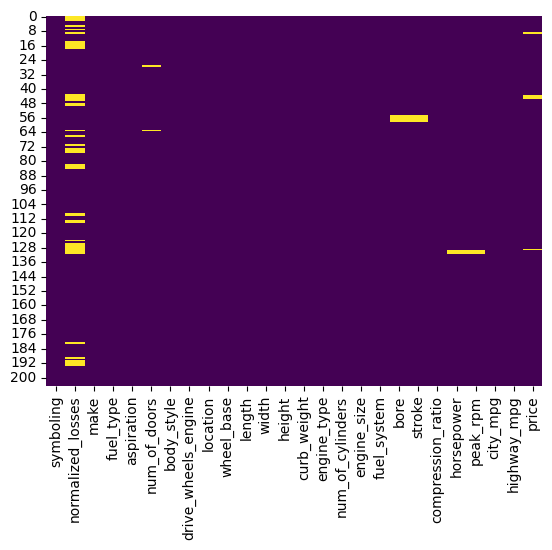

In [8]:
#Visualizing the missing values
sns.heatmap(auto.isnull(),cbar=False,cmap='viridis')

In [9]:
#Replacing the missing values
num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
for col in num_col:
    auto[col]=pd.to_numeric(auto[col])
    auto[col].fillna(auto[col].mean(), inplace=True)
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<AxesSubplot: >

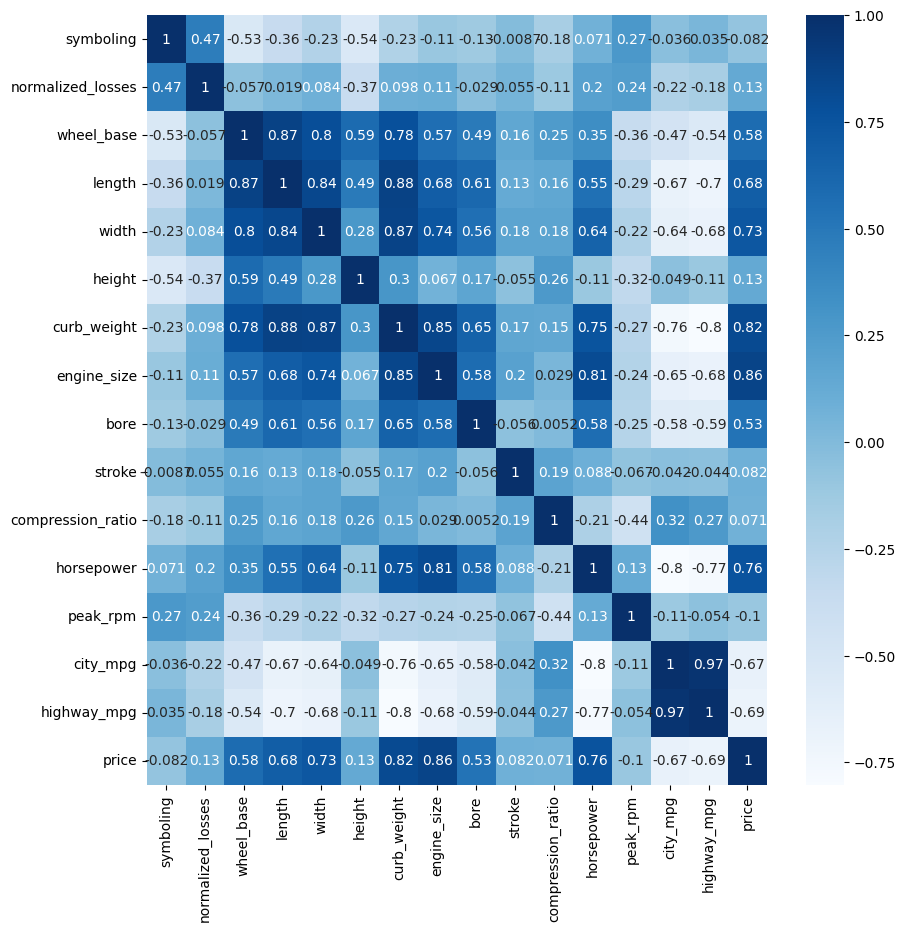

In [10]:
#Asking Analytical Questions and Visualizations
plt.figure(figsize=(10,10))
sns.heatmap(auto.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Price')

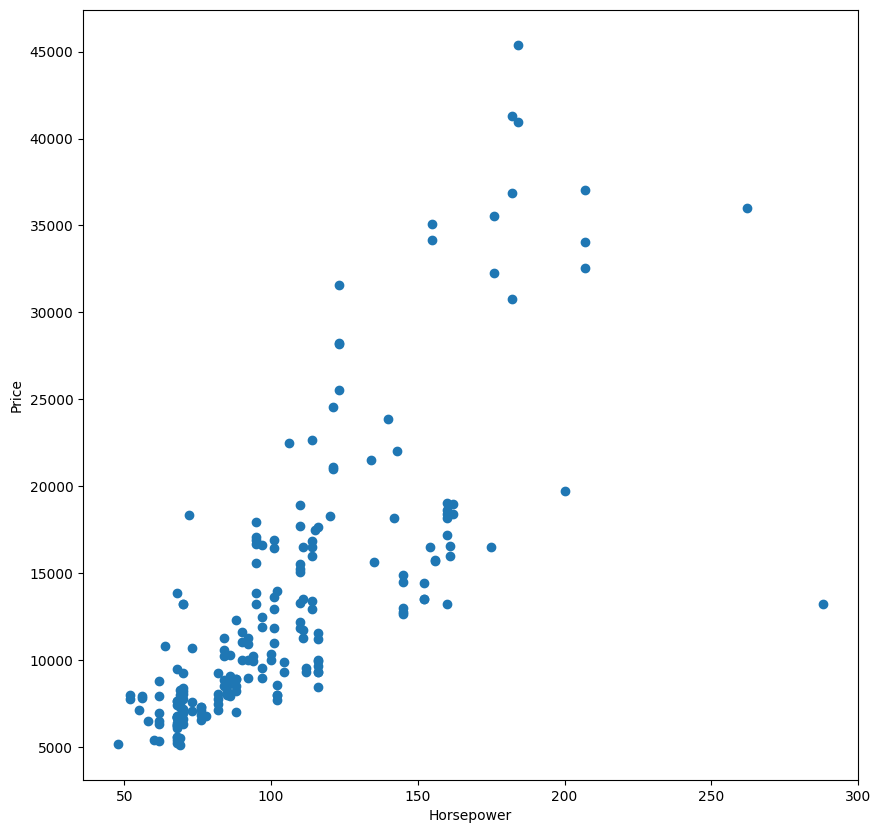

In [11]:
#How does the horsepower affect the price?
plt.figure(figsize=(10,10))
plt.scatter(x='horsepower',y='price',data=auto)
plt.xlabel('Horsepower')
plt.ylabel('Price')

<AxesSubplot: xlabel='horsepower', ylabel='Count'>

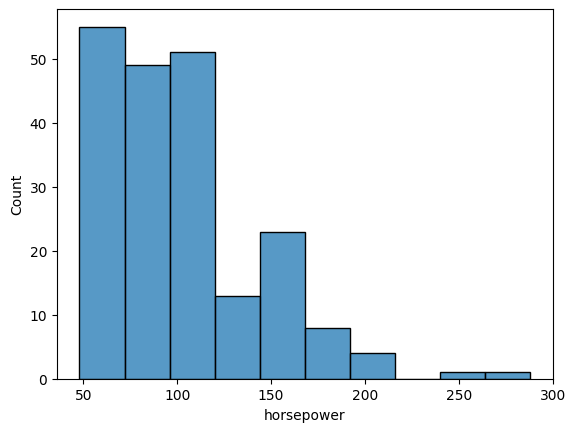

In [12]:
sns.histplot(auto.horsepower,bins=10)

Text(0, 0.5, 'Price')

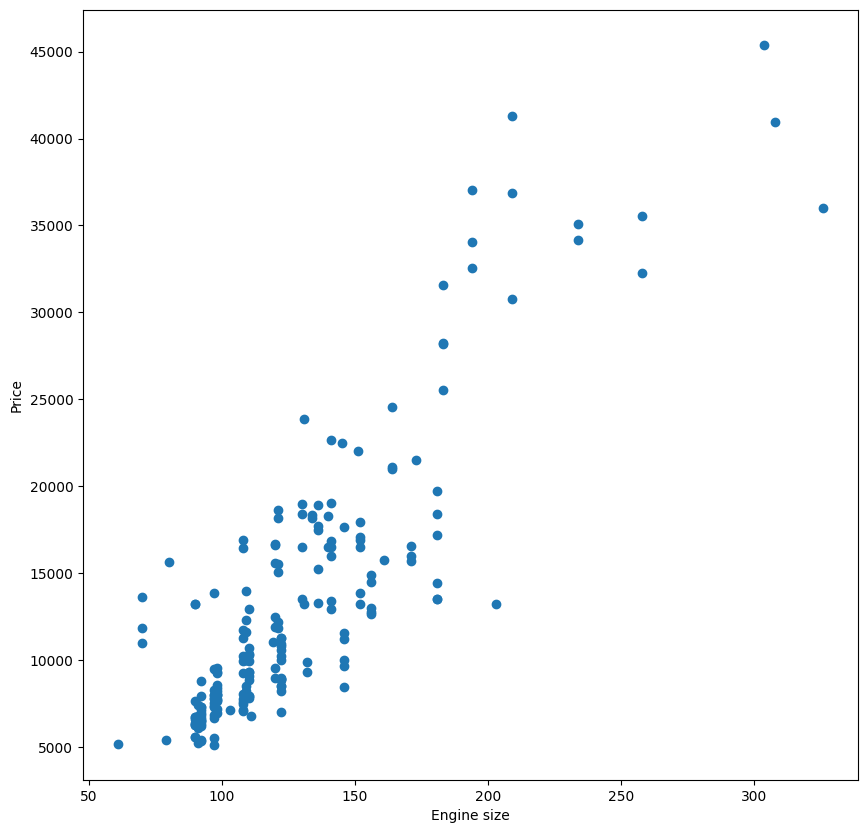

In [13]:
#What is the relation between engine_size and price?
plt.figure(figsize=(10,10))
plt.scatter(x='engine_size',y='price',data=auto)
plt.xlabel('Engine size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

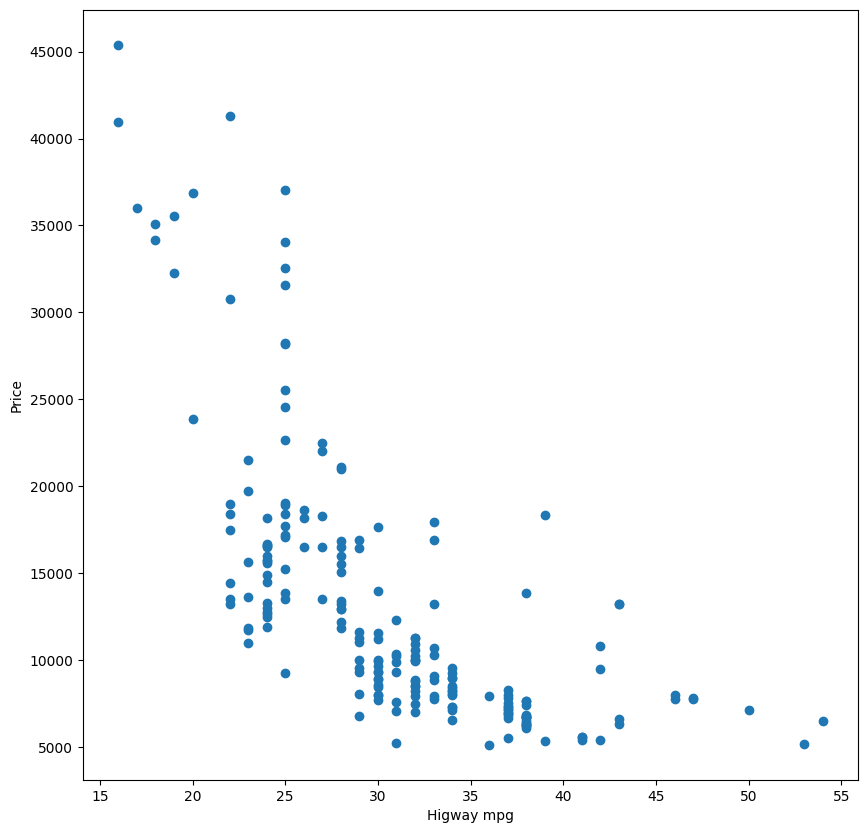

In [14]:
#How does highway_mpg affects price?
plt.figure(figsize=(10,10))
plt.scatter(x='highway_mpg',y='price',data=auto)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

In [15]:
#Unique values in num_of_doors
auto.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

<AxesSubplot: xlabel='price', ylabel='num_of_doors'>

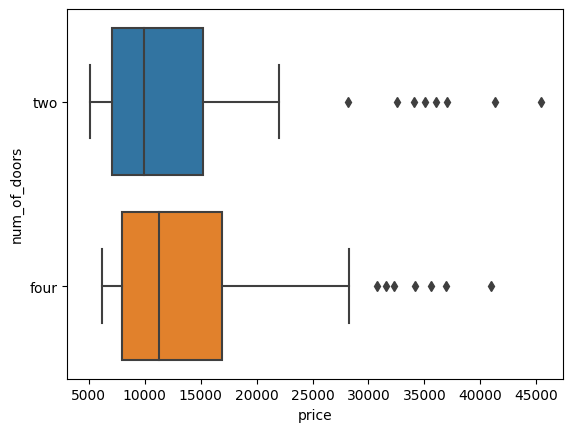

In [16]:
# Relation between no. of doors and price. We will use a boxplot for this analysis.

sns.boxplot(x='price',y='num_of_doors',data=auto)